# Análise Descritiva dos Dados 

## Base: Crime Data in Brazil

### fonte: https://www.kaggle.com/inquisitivecrow/crime-data-in-brazil

### Para começar a 'add' estou importando as bibliotecas Pandas para fazer operações de sql e Seaborn par plotar gráficos.

In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline
%config IPCompleter.greedy=True

### Instalando e em seguida importando o psycopg2 que usarei para criar a conexão com o banco de dados

In [3]:
!pip install psycopg2

In [4]:
import psycopg2

In [5]:
conn = psycopg2.connect(host='localhost',database = 'Criminalidade',user='postgres',password='123456')

### Primeira análise rápida usando pg_stats

#### Foram escolhidos os campos que representam o nome do atributo, fração de nulos existentes em cada atributo, número de valores distintos, valores mais comuns e frequencia dos valores mais comuns

In [6]:
resultado = pd.read_sql_query("""select attname,null_frac,n_distinct,most_common_vals,most_common_freqs from pg_stats where schemaname = 'public' """,conn)

In [7]:
resultado

,attname,null_frac,n_distinct,most_common_vals,most_common_freqs
0,id_delegacia,0.000000,351.0,"{900020,10216,10211,20249,10247,20120,20224,10...","[0.227567, 0.0202667, 0.0192, 0.0182667, 0.015..."
1,nome_departamento,0.000000,16.0,"{DECAP,""DIPOL - DEPTO DE INTELIGENCIA"",DEMACRO...","[0.735167, 0.227567, 0.0211, 0.0061, 0.0033333..."
2,descr_tipolocal,0.000000,29.0,"{""Via pública"",Outros,Residência,""Comércio e s...","[0.545967, 0.227567, 0.0970333, 0.0468333, 0.0..."
3,nome_seccional,0.000000,60.0,"{""DELEGACIA ELETRONICA"",""DEL.SEC.3º OESTE"",""DE...","[0.227567, 0.1135, 0.112633, 0.107533, 0.0883,..."
4,nome_delegacia,0.000000,351.0,"{""DELEGACIA ELETRONICA"",""16º D.P. VILA CLEMENT...","[0.227567, 0.0202667, 0.0192, 0.0182667, 0.015..."
5,cidade,0.000000,12.0,{S.PAULO},[0.998267]
6,ano_bo,0.000000,5.0,"{2016,2014,2013,2015,2017}","[0.3199, 0.240467, 0.206867, 0.205033, 0.0277333]"
7,num_bo,0.000000,25357.0,"{354,63,189,1023,1559,2131,2408,30,62,68,104,1...","[0.000433333, 0.000366667, 0.000366667, 0.0003..."
8,nome_departamento_circ,0.000000,1.0,{DECAP},[1.0]
9,nome_seccional_circ,0.000000,8.0,"{""DEL.SEC.3º OESTE"",""DEL.SEC.1º CENTRO"",""DEL.S...","[0.170467, 0.1512, 0.1424, 0.1321, 0.112967, 0..."


####  Ao olhar o campo null_frac, aparentemente vemos uma base sem nenhum valor null, exceto no atributo logradouro onde tem baixíssimo indice de nulos(0.0033% da base), porém olhando com uma maior atenção encontraremos alguns problemas, se observar o atributo datahora_ocorrencia_bo nos campos most_common_vals e most_common_freq, verá que o valor mais comum não é null e sim uma String 'NULL' e além disso a frequencia é 1, ou seja, esse atributo é completamente inválido e deverá ser removido do banco, pois não agrega nenhum valor ás nossas análises.


### Dropando a coluna datahora_ocorrencia_bo

In [12]:
cur = conn.cursor()

In [13]:
cur.execute("""alter table crime drop column datahora_comunicacao_bo """)

UndefinedColumn: column "datahora_comunicacao_bo" of relation "crime" does not exist


In [11]:
cur.execute("commit")

In [14]:
pd.read_sql_query("""select attname,null_frac,n_distinct,most_common_vals,most_common_freqs from pg_stats where schemaname = 'public' """,conn)

,attname,null_frac,n_distinct,most_common_vals,most_common_freqs
0,id_delegacia,0.000000,351.0,"{900020,10216,10211,20249,10247,20120,20224,10...","[0.227567, 0.0202667, 0.0192, 0.0182667, 0.015..."
1,nome_departamento,0.000000,16.0,"{DECAP,""DIPOL - DEPTO DE INTELIGENCIA"",DEMACRO...","[0.735167, 0.227567, 0.0211, 0.0061, 0.0033333..."
2,descr_tipolocal,0.000000,29.0,"{""Via pública"",Outros,Residência,""Comércio e s...","[0.545967, 0.227567, 0.0970333, 0.0468333, 0.0..."
3,nome_seccional,0.000000,60.0,"{""DELEGACIA ELETRONICA"",""DEL.SEC.3º OESTE"",""DE...","[0.227567, 0.1135, 0.112633, 0.107533, 0.0883,..."
4,nome_delegacia,0.000000,351.0,"{""DELEGACIA ELETRONICA"",""16º D.P. VILA CLEMENT...","[0.227567, 0.0202667, 0.0192, 0.0182667, 0.015..."
5,cidade,0.000000,12.0,{S.PAULO},[0.998267]
6,ano_bo,0.000000,5.0,"{2016,2014,2013,2015,2017}","[0.3199, 0.240467, 0.206867, 0.205033, 0.0277333]"
7,num_bo,0.000000,25357.0,"{354,63,189,1023,1559,2131,2408,30,62,68,104,1...","[0.000433333, 0.000366667, 0.000366667, 0.0003..."
8,nome_departamento_circ,0.000000,1.0,{DECAP},[1.0]
9,nome_seccional_circ,0.000000,8.0,"{""DEL.SEC.3º OESTE"",""DEL.SEC.1º CENTRO"",""DEL.S...","[0.170467, 0.1512, 0.1424, 0.1321, 0.112967, 0..."


#### Em um segundo olhar, logo vemos que mais atributos tem a String 'NULL' como uns dos valores mais comuns, então agora investigaremos alguns desses atributos de forma um pouco mais minuciosa, começando pelo último atributo cor_cutis.

In [15]:
resultado3 = pd.read_sql_query("""select cor_cutis,count(*) from crime group by cor_cutis order by count(*) desc""",conn)

In [16]:
resultado3

,cor_cutis,count
0,Branca,794943
1,NULL,454486
2,Parda,267873
3,Preta,49322
4,Outros,20692
5,Amarela,14081
6,Vermelha,482
7,25,9
8,34,8
9,24,8


#### Com esse teste rapidamente percebemos 3 coisas, primeira de aproximadamente 1.602.000 registros, 2 em cor_cutis são realmente nulos, segunda os campos verdadeiramente nulos estão com a String 'NULL' e somam cerca de 400 mil registros, terceira apareceram vários números, logo, não são cores da pele. Vamos tentar descobrir a causa disso, vamos seleconar os dados onde cor_cutis é igual aos números.

In [17]:
resultado4 = pd.read_sql_query("""select * from crime where not (cor_cutis like '%Branca%') and not (cor_cutis like '%Parda%') and cor_cutis not like '%Amarela%' and cor_cutis not like '%Vermelha%' and cor_cutis not like '%Preta%'  and cor_cutis not like '%Outros%' and cor_cutis is not null and cor_cutis not like '%NULL%'

""",conn)

In [18]:
resultado4

,id_delegacia,nome_departamento,nome_seccional,nome_delegacia,cidade,ano_bo,num_bo,nome_departamento_circ,nome_seccional_circ,nome_delegacia_circ,...,descr_subtipolocal,logradouro,numero_logradouro,latitude,longitude,descr_tipo_pessoa,flag_vitima_fatal,sexo_pessoa,idade_pessoa,cor_cutis
0,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,302,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,...,Metrov. e ferroviário metrop.-Desembarque,ENTRE BRAS/SÉ,DESEMBARQUE,999,-23.54938522,-46.63325723,Vítima,NULL,M,43
1,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2015,900016,DECAP,DEL.SEC.5º LESTE,30º D.P. TATUAPE,...,Metrov. e ferroviário metrop.-outros,ESTAÇÃO TATUAPÉ,MEZANINO AREA LIVRE,99,NULL,NULL,Vítima,NULL,M,55
2,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2015,900016,DECAP,DEL.SEC.5º LESTE,30º D.P. TATUAPE,...,Metrov. e ferroviário metrop.-outros,ESTAÇÃO TATUAPÉ,MEZANINO AREA LIVRE,99,NULL,NULL,Vítima,NULL,F,25
3,10217,DECAP,DEL.SEC.2º SUL,17º D.P. DOUTOR ALDO GALIANO,S.PAULO,2015,3505,DECAP,DEL.SEC.2º SUL,17º D.P. DOUTOR ALDO GALIANO,...,Via pública,RUA ISAURA ABAD GIACOMELLI,None,87,NULL,NULL,Vítima,NULL,M,25
4,10217,DECAP,DEL.SEC.2º SUL,17º D.P. DOUTOR ALDO GALIANO,S.PAULO,2015,3505,DECAP,DEL.SEC.2º SUL,17º D.P. DOUTOR ALDO GALIANO,...,Via pública,RUA ISAURA ABAD GIACOMELLI,None,87,NULL,NULL,Vítima,NULL,M,24
5,10226,DECAP,DEL.SEC.2º SUL,26º D.P. SACOMA,S.PAULO,2015,6687,DECAP,DEL.SEC.2º SUL,95º D.P. HELIÓPOLIS,...,Vidraria-Acesso,/Escada/Elevador/Passarela,AVENIDA ALMIRANTE DELAMARE,800,-23.60736817,-46.59262144,Vítima,NULL,F,51
6,10226,DECAP,DEL.SEC.2º SUL,26º D.P. SACOMA,S.PAULO,2015,6687,DECAP,DEL.SEC.2º SUL,95º D.P. HELIÓPOLIS,...,Vidraria-Acesso,/Escada/Elevador/Passarela,AVENIDA ALMIRANTE DELAMARE,800,-23.60736817,-46.59262144,Vítima,NULL,M,47
7,10226,DECAP,DEL.SEC.2º SUL,26º D.P. SACOMA,S.PAULO,2015,6687,DECAP,DEL.SEC.2º SUL,95º D.P. HELIÓPOLIS,...,Vidraria-Acesso,/Escada/Elevador/Passarela,AVENIDA ALMIRANTE DELAMARE,800,-23.60736817,-46.59262144,Vítima,NULL,F,79
8,10004,DIRD - DEPTO IDENT.REG.DIV,DIV.POL.PORTO/AERO/PROT.TURIS-DECADE,06º D.P. METROPOLITANO,S.PAULO,2013,2816,DECAP,DEL.SEC.1º CENTRO,06º D.P. CAMBUCI,...,Metrov. e ferroviário metrop.-vagão,ENTRE ESTA§ÃO S.JOAQUIM,LIBERDADE,999,-23.57806782,-46.6405597,Vítima,NULL,F,30
9,10248,DECAP,DEL.SEC.6º SANTO AMARO,48º D.P. CIDADE DUTRA,S.PAULO,2013,1372,DECAP,DEL.SEC.6º SANTO AMARO,101º D.P. JDIM IMBUIAS,...,Serralheria-Acesso,/Escada/Elevador/Passarela,R DR OSCAR ANDRADE LEMOS,910,-23.73392446,-46.69437827,Vítima,NULL,M,56


#### Perceba que a linha por algum motivo deu um SHIFT na hora do ETL e corrompeu esses dados, ou seja, a idade está em cor_cutis, como achamos esse resultado no último atributo, todas as linhas afetadas por esse shift estão presentes, logo apagaremos todas essas linhas da nossa base de dados, juntamente com as linhas onde 'cor_cutis' = "NULL" e onde os dados são verdadeiramente nulos.

In [19]:
cur = conn.cursor()

In [20]:
cur.execute("""delete from crime where not (cor_cutis like '%Branca%') and not (cor_cutis like '%Parda%') and cor_cutis not like '%Amarela%' and cor_cutis not like '%Vermelha%' and cor_cutis not like '%Preta%'  and cor_cutis not like '%Outros%'""")

In [21]:
cur.execute("commit")

In [22]:
resultado5 = pd.read_sql_query("""select cor_cutis,count(*) from crime group by cor_cutis order by count(*) desc""",conn)

In [23]:
resultado5

,cor_cutis,count
0,Branca,794943
1,Parda,267873
2,Preta,49322
3,Outros,20692
4,Amarela,14081
5,Vermelha,482
6,None,2


#### Agora vamos analisar outras colunas que requerem uma formatação especial, por exemplo, a coluna hora_ocorrencia_bo 

In [24]:
resultado6 = pd.read_sql_query("""select hora_ocorrencia_bo,count(*) from crime group by hora_ocorrencia_bo order by count(*) desc""",conn)

In [25]:
resultado6

,hora_ocorrencia_bo,count
0,NULL,129003
1,20:00,23602
2,21:00,23248
3,22:00,22016
4,19:00,21124
5,14:00,18842
6,20:30,18724
7,23:00,18551
8,15:00,18289
9,12:00,17930


#### Ao final do resultado6, observamos que aparecem alguns dados em formato impróprio para a manipulação no banco de dados, agora faremos uma verificação se são os unicos casos em que isso ocorre ou se existem outros casos com mais número de registros onde isso ocorre, ou seja, onde hora_ocorrencia_bo é diferente de String 'NULL' e diferente de formato 12:00.

In [26]:
resultado7 = pd.read_sql_query("""select hora_ocorrencia_bo from crime where hora_ocorrencia_bo not like '%:%' and hora_ocorrencia_bo not like 'NULL'""",conn)

In [27]:
resultado7

,hora_ocorrencia_bo
0,15H50
1,15H50
2,1910
3,23H00
4,23H00


#### Como existem poucos dados que foram inseridos com uma formatação inadequada, faremos 3 alterações para mudar os valores desse atributo para o formato correto

In [28]:
cur = conn.cursor()

In [29]:
cur.execute("""update crime set hora_ocorrencia_bo = '15:50' where hora_ocorrencia_bo = '15H50' """)

In [30]:
cur.execute("""update crime set hora_ocorrencia_bo = '23:00' where hora_ocorrencia_bo = '23H00' """)

In [31]:
cur.execute("""update crime set hora_ocorrencia_bo = '19:10' where hora_ocorrencia_bo = '1910' """)

In [32]:
cur.execute("commit")

In [33]:
resultado8 = pd.read_sql_query("""select hora_ocorrencia_bo from crime where hora_ocorrencia_bo not like '%:%' and hora_ocorrencia_bo not like 'NULL'""",conn)

In [34]:
resultado8.head()

,hora_ocorrencia_bo


#### Agora vamos fazer um estudo sobre quais horarios foram cometidos mais BO's

In [152]:
resultado9 = pd.read_sql_query("""select hora_ocorrencia_bo from crime  where hora_ocorrencia_bo not like '%NULL%' """,conn)

In [153]:
resultado9

,hora_ocorrencia_bo
0,06:20
1,06:10
2,05:30
3,12:05
4,05:50
5,23:20
6,06:45
7,14:30
8,20:00
9,05:30


In [161]:
df = resultado9.copy()

In [162]:
df2 = pd.DataFrame()


In [163]:
df2["hora_inteira"] = df["hora_ocorrencia_bo"].apply(lambda x: x[:2])


In [164]:
s = df2["hora_inteira"].value_counts()


In [165]:
df3 = pd.DataFrame({'hora_inteira':s.index, 'count':s.values})


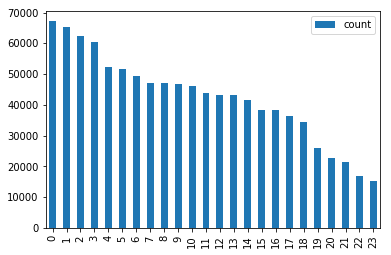

In [166]:
df3.plot.bar()